# EXPLORATORY DATA ANALYSIS

In [336]:
###import Libraries
!pip install kaggle
import kaggle


In [337]:
## Downloading dataset from kaggle
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv


Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
orders.csv: Skipping, found more recently modified local copy (use --force to force download)


In [338]:
#extract file from zip file
import zipfile
zip_ref = zipfile.ZipFile('/Users/smritishrestha/Downloads/archive.zip') 
zip_ref.extractall() # extract file to dir
zip_ref.close() # close file


In [339]:
#####import pandas library
import pandas as pd #33 pd is used as alias

In [340]:
### readinf the csv file 
df = pd.read_csv('orders.csv')

In [341]:
###Checking the first five columns of data
df.head(5)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [342]:
###Checking the last five columns of data

df.tail(5)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3
9993,9994,2022-07-17,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,OFF-AP-10002684,210,240,2,3


##                                     Data CLEANING

In [343]:
## Checking for null values
df.isna().sum()

Order Id            0
Order Date          0
Ship Mode           1
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

##### Ship Mode column has got one null value. Lets check it

In [344]:
df['Ship Mode'].isnull().sum()

np.int64(1)

In [345]:
df[df['Ship Mode'].isnull()]



,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
118,119,2023-07-19,NaN,Corporate,United States,Bristol,Tennessee,37620,South,Office Supplies,Binders,OFF-BI-10003650,140,160,1,5


### Removing the null data

In [346]:
df = df.dropna()


### checking for the null value

In [347]:
df.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

### CHCEKING FOR UNIQUE VALUES

In [348]:
df.nunique()


Order Id            9993
Order Date           730
Ship Mode              6
Segment                3
Country                1
City                 531
State                 49
Postal Code          631
Region                 4
Category               3
Sub Category          17
Product Id          1862
cost price           280
List Price           289
Quantity              14
Discount Percent       4
dtype: int64

## ASSUMING and checking the columns that might have data error


In [349]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', 'Same Day'], dtype=object)

### 'Not Available' and 'Unknown' are also considered to be null

In [350]:
df[df['Ship Mode'].isin(['unknown', 'Not Available'])]


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
10,11,2023-03-31,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,FUR-TA-10001539,1470,1710,9,3
11,12,2023-12-25,Not Available,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002033,750,910,4,3
14,15,2023-11-09,unknown,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,OFF-AP-10002311,60,70,5,5


In [351]:
df[~df['Ship Mode'].isin(['unknown', 'Not Available'])]

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


In [352]:
df['Ship Mode'].value_counts()


Ship Mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Not Available        4
unknown              1
Name: count, dtype: int64

In [353]:
df = df[~df['Ship Mode'].str.strip().str.lower().isin(['unknown', 'not available'])]


In [354]:
df['Ship Mode'].value_counts()


Ship Mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [355]:
df.nunique()

Order Id            9988
Order Date           730
Ship Mode              4
Segment                3
Country                1
City                 531
State                 49
Postal Code          631
Region                 4
Category               3
Sub Category          17
Product Id          1862
cost price           280
List Price           288
Quantity              14
Discount Percent       4
dtype: int64

In [356]:
df.dtypes

Order Id             int64
Order Date          object
Ship Mode           object
Segment             object
Country             object
City                object
State               object
Postal Code          int64
Region              object
Category            object
Sub Category        object
Product Id          object
cost price           int64
List Price           int64
Quantity             int64
Discount Percent     int64
dtype: object

### Changing the data type of order date to dat time from object

In [357]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [358]:
df.dtypes

Order Id                     int64
Order Date          datetime64[ns]
Ship Mode                   object
Segment                     object
Country                     object
City                        object
State                       object
Postal Code                  int64
Region                      object
Category                    object
Sub Category                object
Product Id                  object
cost price                   int64
List Price                   int64
Quantity                     int64
Discount Percent             int64
dtype: object

### Since some of the columns are in uppercase and some of them are in lowercase , we will be puttimg them all in same.

In [359]:
df.columns = df.columns.str.upper()


In [360]:
df

,ORDER ID,ORDER DATE,SHIP MODE,SEGMENT,COUNTRY,CITY,STATE,POSTAL CODE,REGION,CATEGORY,SUB CATEGORY,PRODUCT ID,COST PRICE,LIST PRICE,QUANTITY,DISCOUNT PERCENT
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


In [361]:
df.describe()

,ORDER ID,ORDER DATE,POSTAL CODE,COST PRICE,LIST PRICE,QUANTITY,DISCOUNT PERCENT
count,9988.000000,9988,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,5000.484882,2022-12-29 08:30:56.948337920,55176.091109,201.061274,229.602523,3.788947,3.484081
min,1.000000,2022-01-01 00:00:00,1040.000000,0.000000,0.000000,1.000000,2.000000
25%,2503.750000,2022-06-29 00:00:00,23223.000000,20.000000,20.000000,2.000000,2.000000
50%,5000.500000,2022-12-27 12:00:00,56301.000000,50.000000,50.000000,3.000000,3.000000
75%,7497.250000,2023-07-03 00:00:00,90008.000000,180.000000,210.000000,5.000000,4.000000
max,9994.000000,2023-12-31 00:00:00,99301.000000,18110.000000,22640.000000,14.000000,5.000000
std,2883.457544,NaN,32064.574776,537.719406,623.211282,2.224712,1.114209


### Checking duplicate data

In [362]:
df.duplicated().sum()

np.int64(0)

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDER ID          9988 non-null   int64         
 1   ORDER DATE        9988 non-null   datetime64[ns]
 2   SHIP MODE         9988 non-null   object        
 3   SEGMENT           9988 non-null   object        
 4   COUNTRY           9988 non-null   object        
 5   CITY              9988 non-null   object        
 6   STATE             9988 non-null   object        
 7   POSTAL CODE       9988 non-null   int64         
 8   REGION            9988 non-null   object        
 9   CATEGORY          9988 non-null   object        
 10  SUB CATEGORY      9988 non-null   object        
 11  PRODUCT ID        9988 non-null   object        
 12  COST PRICE        9988 non-null   int64         
 13  LIST PRICE        9988 non-null   int64         
 14  QUANTITY          9988 non-nu

# EXPLORATORY DATA ANALYSIS

## Deriving new discount column by measuring the discount percent with list cost

In [364]:
df['discount']= (df['DISCOUNT PERCENT'] * df['LIST PRICE'] * 0.1)
print(df['discount'])

0        52.0
1       219.0
2         5.0
3       192.0
4        10.0
        ...  
9989     12.0
9990     36.0
9991     52.0
9992      9.0
9993     72.0
Name: discount, Length: 9988, dtype: float64


In [365]:
df['discount'] = df['discount'].astype(int)


In [366]:
df.columns = df.columns.str.upper()

In [367]:
df

,ORDER ID,ORDER DATE,SHIP MODE,SEGMENT,COUNTRY,CITY,STATE,POSTAL CODE,REGION,CATEGORY,SUB CATEGORY,PRODUCT ID,COST PRICE,LIST PRICE,QUANTITY,DISCOUNT PERCENT,DISCOUNT
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,52
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,219
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,192
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,12
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,36
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,52
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,9


## Deriving new sale_price column by calculating with discount and list_price

In [368]:
df['Sale Price'] = (df['LIST PRICE'] - df['DISCOUNT'])
print(df['Sale Price'])

0       208
1       511
2         5
3       768
4        10
       ... 
9989     18
9990     54
9991    208
9992     21
9993    168
Name: Sale Price, Length: 9988, dtype: int64


In [369]:
df['Sale Price'] = df['Sale Price'].astype(int)
print(df['Sale Price'])




0       208
1       511
2         5
3       768
4        10
       ... 
9989     18
9990     54
9991    208
9992     21
9993    168
Name: Sale Price, Length: 9988, dtype: int64


In [370]:
df.columns = df.columns.str.upper()

### Dropping the unnecessary columns ( List price, cost price and discount percent)

In [371]:
df.drop(columns =['LIST PRICE', 'DISCOUNT PERCENT'], inplace= True)
## using inplace = true for the permanent change in data

In [372]:
### find top 10 highest revenuw generating products
df.head()

,ORDER ID,ORDER DATE,SHIP MODE,SEGMENT,COUNTRY,CITY,STATE,POSTAL CODE,REGION,CATEGORY,SUB CATEGORY,PRODUCT ID,COST PRICE,QUANTITY,DISCOUNT,SALE PRICE
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,2,52,208
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,3,219,511
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,2,5,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,5,192,768
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,2,10,10


In [373]:
### Revenue = Sale price * Quantity
df['Revenue']= df['SALE PRICE'] * df['QUANTITY']
print(df['Revenue'])

0        416
1       1533
2         10
3       3840
4         20
        ... 
9989      54
9990     108
9991     416
9992      84
9993     336
Name: Revenue, Length: 9988, dtype: int64


In [374]:
## Group ny product to find total revenue per product
product_revenue = df.groupby(['PRODUCT ID','CATEGORY' ,'SUB CATEGORY',])['Revenue'].sum().reset_index()

In [375]:
## sORT BY REVENUE AND TAKE TOP 10
TOP_10_PRODUCT= product_revenue.sort_values(by='Revenue', ascending = False).head(10)

In [376]:
##Display the product
print(TOP_10_PRODUCT)

           PRODUCT ID         CATEGORY SUB CATEGORY  Revenue
1614  TEC-CO-10004722       Technology      Copiers   169960
657   OFF-BI-10000545  Office Supplies      Binders    94187
1642  TEC-MA-10002412       Technology     Machines    81504
80    FUR-CH-10002024        Furniture       Chairs    80677
1604  TEC-CO-10001449       Technology      Copiers    70560
1724  TEC-PH-10001459       Technology       Phones    67609
776   OFF-BI-10003527  Office Supplies      Binders    65249
1631  TEC-MA-10001127       Technology     Machines    60102
1624  TEC-MA-10000822       Technology     Machines    56253
1442  OFF-SU-10002881  Office Supplies     Supplies    55594


## Visualizing it

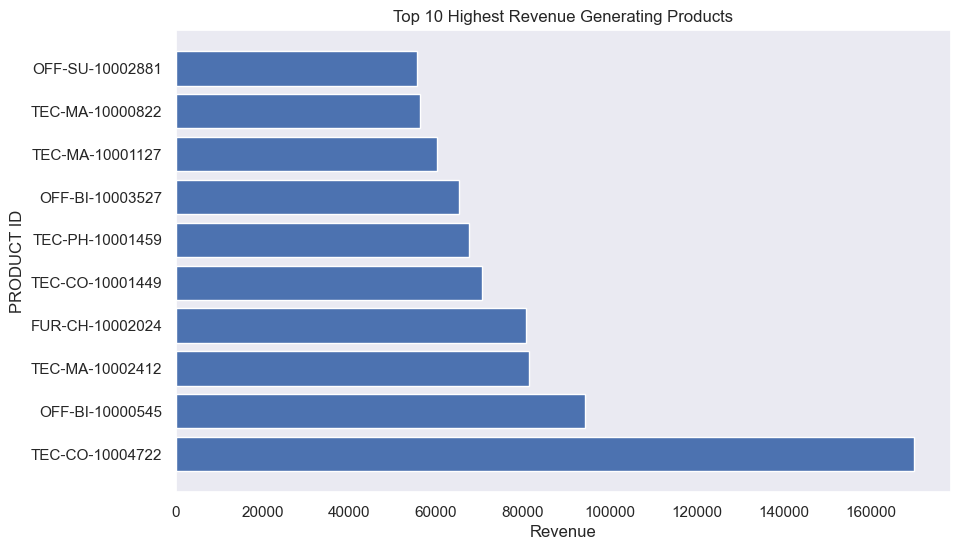

In [377]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(TOP_10_PRODUCT['PRODUCT ID'], TOP_10_PRODUCT['Revenue'])
plt.xlabel('Revenue')
plt.ylabel('PRODUCT ID')
plt.title('Top 10 Highest Revenue Generating Products')
plt.show()

### Find top 5 highest selling products in each region


In [378]:
#Group by product and region
region_product_revenue= df.groupby(['PRODUCT ID','REGION'])['Revenue'].sum().reset_index()

In [379]:
#sort within region
region_product_revenue = region_product_revenue.sort_values(['REGION','Revenue'],ascending =[True, False])

In [380]:
#take top 5 overall
top_5_per_region = region_product_revenue.groupby('REGION').head(5)

In [381]:
print(top_5_per_region)

           PRODUCT ID   REGION  Revenue
1890  OFF-BI-10000545  Central    66945
4700  TEC-CO-10004722  Central    61250
4719  TEC-MA-10000822  Central    49878
1971  OFF-BI-10001120  Central    42525
2498  OFF-BI-10004995  Central    30060
4701  TEC-CO-10004722     East    75110
4727  TEC-MA-10001047     East    54990
123   FUR-BO-10004834     East    43182
4671  TEC-CO-10001449     East    39240
227   FUR-CH-10002024     East    39216
4745  TEC-MA-10002412    South    81504
4919  TEC-PH-10001459    South    42811
4729  TEC-MA-10001127    South    40502
927   FUR-TA-10000198    South    39269
4780  TEC-MA-10004125    South    25600
4580  TEC-AC-10003832     West    41468
1043  FUR-TA-10003473     West    37185
4702  TEC-CO-10004722     West    33600
4150  OFF-SU-10000151     West    32259
337   FUR-CH-10003973     West    26104


### Data visualization


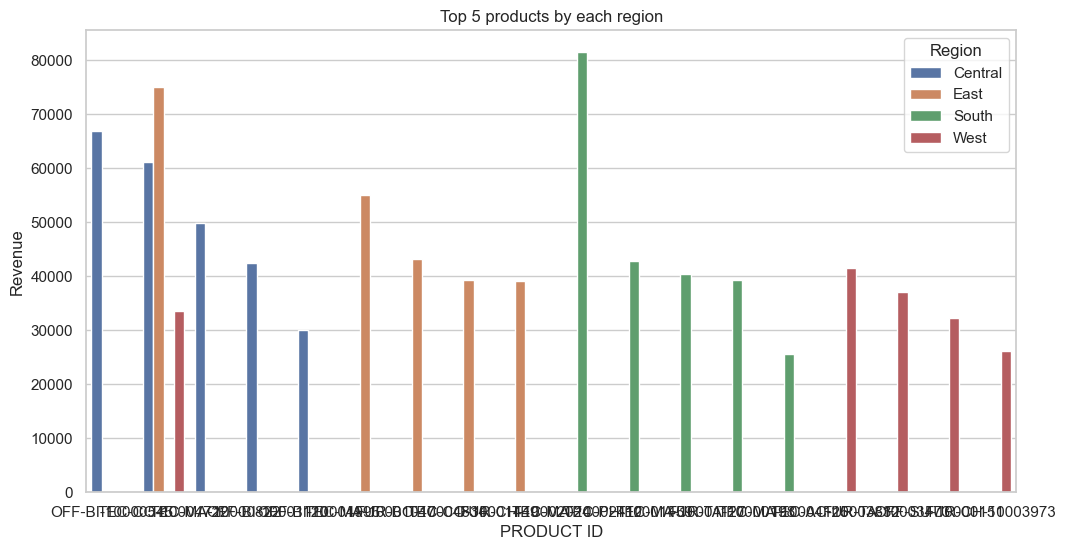

In [382]:
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(data=top_5_per_region, x ='PRODUCT ID', y ='Revenue', hue='REGION')
plt.xlabel('PRODUCT ID')
plt.ylabel('Revenue')
plt.title('Top 5 products by each region')
plt.legend(title='Region')
plt.show()

### The data visualization seems to look a bit messy as we have 20 data to show and the product id is a bit lengthy and confusing.


In [383]:
##find the region where each top product sells the most:
best_region = region_product_revenue.loc[region_product_revenue.groupby('PRODUCT ID')['Revenue'].idxmax(),['PRODUCT ID','REGION']]
##merge with top 5 revenue prodcust
top5_with_region = pd.merge(top_5_per_region, best_region, on ='PRODUCT ID', how ='left')
print(top5_with_region)

         PRODUCT ID REGION_x  Revenue REGION_y
0   OFF-BI-10000545  Central    66945  Central
1   TEC-CO-10004722  Central    61250     East
2   TEC-MA-10000822  Central    49878  Central
3   OFF-BI-10001120  Central    42525  Central
4   OFF-BI-10004995  Central    30060  Central
5   TEC-CO-10004722     East    75110     East
6   TEC-MA-10001047     East    54990     East
7   FUR-BO-10004834     East    43182     East
8   TEC-CO-10001449     East    39240     East
9   FUR-CH-10002024     East    39216     East
10  TEC-MA-10002412    South    81504    South
11  TEC-PH-10001459    South    42811    South
12  TEC-MA-10001127    South    40502    South
13  FUR-TA-10000198    South    39269    South
14  TEC-MA-10004125    South    25600    South
15  TEC-AC-10003832     West    41468     West
16  FUR-TA-10003473     West    37185     West
17  TEC-CO-10004722     West    33600     East
18  OFF-SU-10000151     West    32259     West
19  FUR-CH-10003973     West    26104     West


In [384]:
plt.figure(figsize=(10,6))
sns.barplot(data = top5_with_region, x ='PRODUCT ID', y = 'Revenue', hue ='REGION')
plt.title('Region where each top product sells the most')
plt.show()

ValueError: Could not interpret value `REGION` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

## This shows that the top products are mostly sold in eastern region followed by central and south.

In [ ]:
df.head()

,ORDER ID,ORDER DATE,SHIP MODE,SEGMENT,COUNTRY,CITY,STATE,POSTAL CODE,REGION,CATEGORY,SUB CATEGORY,PRODUCT ID,COST PRICE,QUANTITY,DISCOUNT,SALE PRICE,Revenue
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,2,52,208,416
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,3,219,511,1533
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,2,5,5,10
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,5,192,768,3840
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,2,10,10,20


In [ ]:
df['PRODUCT ID'].unique()

array(['FUR-BO-10001798', 'FUR-CH-10000454', 'OFF-LA-10000240', ...,
       'OFF-AP-10003099', 'TEC-PH-10002645', 'OFF-ST-10001627'],
      dtype=object)

## most sold category according to the region


In [ ]:
category_per_region = df.groupby(['CATEGORY','REGION'])['Revenue'].sum().reset_index()


In [ ]:
most_sold_category = category_per_region.sort_values( ['REGION','Revenue'], ascending=[True,False]).groupby('REGION').head(1)

In [ ]:
print(most_sold_category)

           CATEGORY   REGION  Revenue
4   Office Supplies  Central   538122
9        Technology     East   809708
10       Technology    South   506544
3         Furniture     West   828923


## Data Visualization

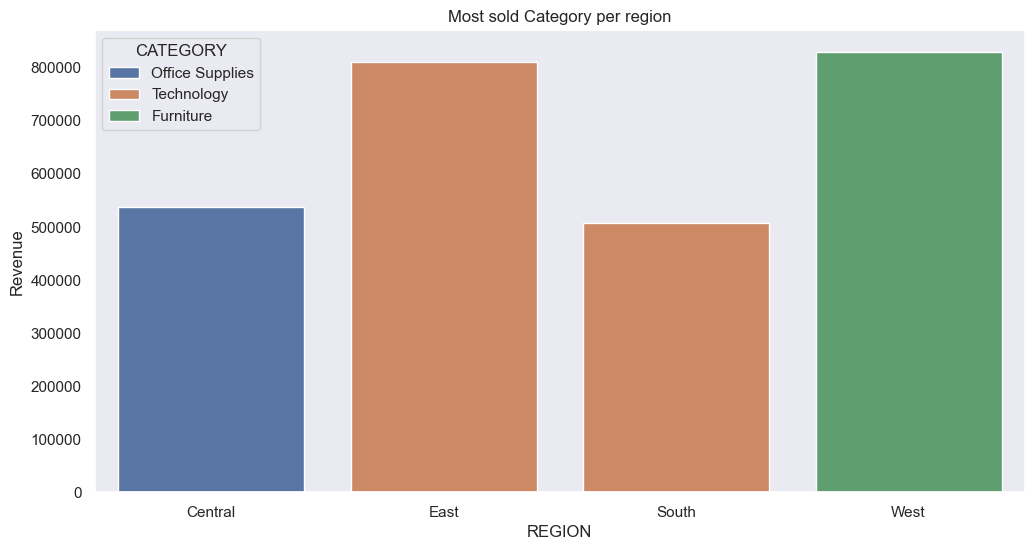

In [ ]:
sns.set(style='dark')
plt.figure(figsize=(12,6))
sns.barplot(data=most_sold_category, x ='REGION', y ='Revenue', hue='CATEGORY')
plt.title('Most sold Category per region')
plt.show()

#### This shows that central region sells the office supplies in large number, east and south region sells the technology category products in large number ;east region being the top and west region sells furniture items in large number.

### Find month over month comparison across years

In [ ]:
### Extract year and month
df['YEAR'] = df['ORDER DATE'].dt.year
df['MONTH']= df['ORDER DATE'].dt.month

In [ ]:
## Now group by year and month
monthly_sales= df.groupby(['YEAR','MONTH'])['Revenue'].sum().reset_index()

In [ ]:
#pivot to compare months across. years
monthly_comparision = monthly_sales.pivot(index = 'MONTH', columns ='YEAR', values ='Revenue')
print(monthly_comparision)

YEAR     2022    2023
MONTH                
1      288403  301345
2      302271  478008
3      266467  256338
4      313689  367025
5      279215  278569
6      305913  220120
7      250524  295137
8      356204  317413
9      288150  292375
10     386858  414173
11     290886  227491
12     297768  338541


## visualizing it

<Figure size 1200x600 with 0 Axes>

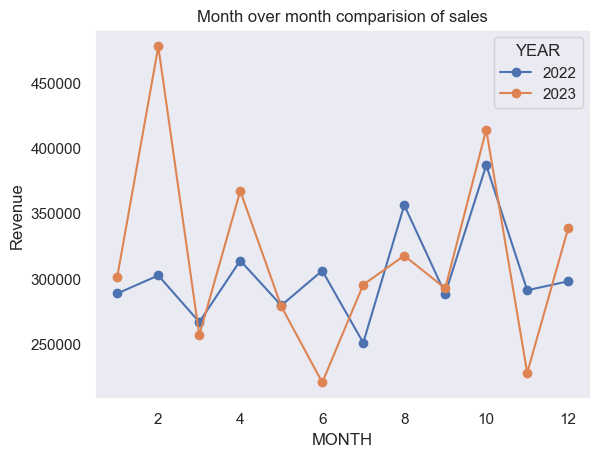

In [ ]:
plt.figure(figsize=(12,6))
monthly_comparision.plot(kind='line', marker='o')

plt.xlabel('MONTH')
plt.ylabel('Revenue')
plt.legend(title='YEAR')
plt.title('Month over month comparision of sales')
plt.show()

## conclusion from this analysis:
### 1.  Sales in 2023 were generally higher than 2022, especially in Q1 (Jan–Apr) and Q4 (Oct–Dec).
### 2. February 2023 shows a remarkable increase in revenue.
### 3. June 2023 saw the largest decline (−85K), indicating a potential off-season period or supply issue.
### 4. November 2023 also dropped notably compared to 2022.
### 5. After a dip mid-year, sales picked up again in October–December 2023, possibly due to holiday season demand.

## Find yearly comparision of sales

In [ ]:

df.head()

,ORDER ID,ORDER DATE,SHIP MODE,SEGMENT,COUNTRY,CITY,STATE,POSTAL CODE,REGION,CATEGORY,SUB CATEGORY,PRODUCT ID,COST PRICE,QUANTITY,DISCOUNT,SALE PRICE,Revenue
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,2,52,208,416
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,3,219,511,1533
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,2,5,5,10
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,5,192,768,3840
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,2,10,10,20


In [ ]:
yearly_comparision = df.groupby('YEAR')['Revenue'].sum().reset_index()
print(yearly_comparision)

   YEAR  Revenue
0  2022  3626348
1  2023  3786535


### Visualize it

/var/folders/sz/734f48tj3zx3y_s5mc0pmmv80000gn/T/ipykernel_6071/3073692496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =yearly_comparision, x ='YEAR', y ='Revenue', palette='coolwarm')


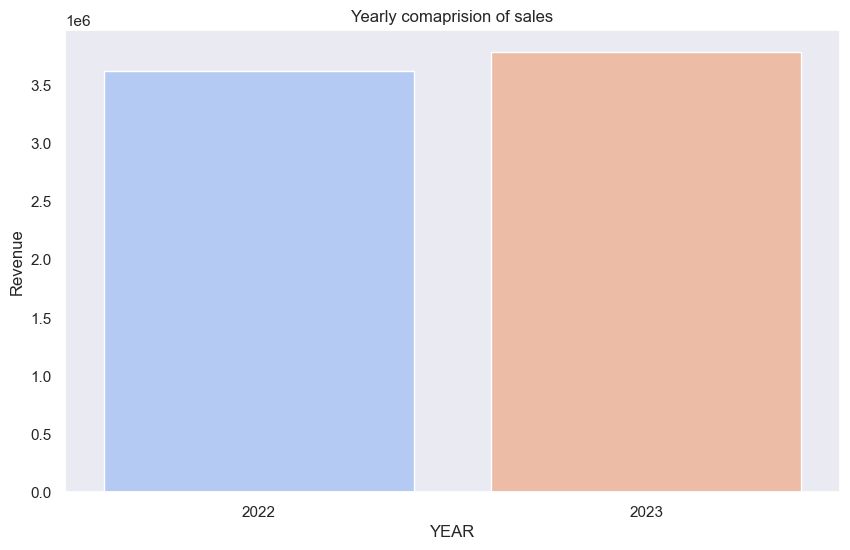

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data =yearly_comparision, x ='YEAR', y ='Revenue', palette='coolwarm')
plt.title('Yearly comaprision of sales')
plt.show()

## Find the month with highest sale  for each category

In [ ]:
#extract month from orderdate column
df['MONTH']= df['ORDER DATE'].dt.month
high_sales = df.groupby(['MONTH','CATEGORY'])['Revenue'].sum().reset_index()

In [393]:
month_with_high_sales = high_sales.loc[high_sales.groupby('CATEGORY')['Revenue'].idxmax()].reset_index(drop=True)
print(month_with_high_sales)

   MONTH         CATEGORY  Revenue
0      2        Furniture   273239
1      2  Office Supplies   285766
2     10       Technology   349672



### vISUALIZING IT

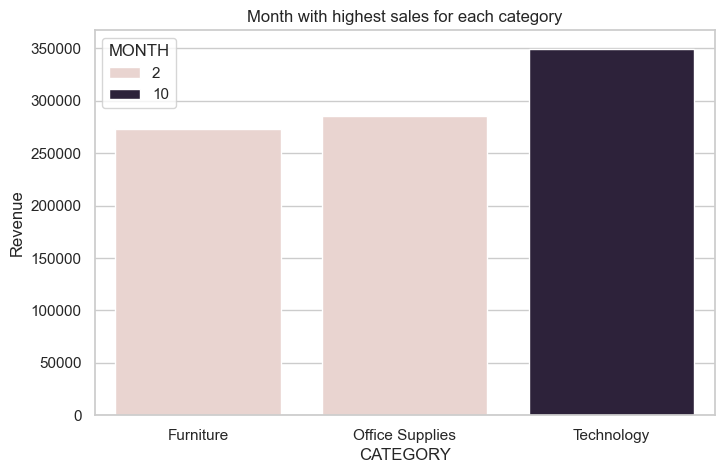

In [394]:
plt.figure(figsize=(8,5))
sns.barplot(data = month_with_high_sales, x = 'CATEGORY', y ='Revenue', hue='MONTH')
plt.title('Month with highest sales for each category')
plt.show()

## This shows that:
### Furniture had its highest sales in February.
### Office Supplies peaked in February.
### Technology performed best in October.

## Which sub category has the highest growth by profit in 2023 compare to 2022??